In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats #spearman rank correlation


# Load in Data

In [2]:
# Load the ET R and Python Comparison CSV 
df = pd.read_csv('data/et_R_python_comparison.csv')

# View first five rows
df.head()

df[df['Site'] == 'Arizona (Willcox Basin)'].head()



,Site,Year,ET (R),ET (Python),Difference,Average Diff (Abs),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Arizona (Willcox Basin),2000.0,183.304348,206.75000,-23.445652,20.942761,NaN,NaN,NaN,NaN,NaN,NaN
1,Arizona (Willcox Basin),2001.0,246.591304,251.81001,-5.218706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona (Willcox Basin),2002.0,205.339130,224.33000,-18.990870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona (Willcox Basin),2003.0,210.904348,222.95000,-12.045652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arizona (Willcox Basin),2004.0,242.556522,265.68000,-23.123478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Load Summary stats CSV
df_avg = pd.read_csv('data/et_R_python_min_max_diff.csv')

# View df
df_avg.head()

,Site,Avg Diff,Std,Min diff,Max diff
0,Arizona (Willcox Basin),20.94,23.57,3.06,43.86
1,Nevada (Amargosa),1.42,0.70,0.39,3.05
2,central Saudi Arabia (recovery near Al Kharj),0.00,0.00,0.00,0.00
3,Cuyama,5.00,4.75,0.05,3.05
4,MexicoAguascaliente,4.99,5.76,0.38,14.84


# Remove unnamed columns

In [4]:
# Removed any `unamed columns`
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# View first five rows
df.head()

#df[df['Site'] == 'Arizona (Willcox Basin)']


,Site,Year,ET (R),ET (Python),Difference,Average Diff (Abs)
0,Arizona (Willcox Basin),2000.0,183.304348,206.75000,-23.445652,20.942761
1,Arizona (Willcox Basin),2001.0,246.591304,251.81001,-5.218706,NaN
2,Arizona (Willcox Basin),2002.0,205.339130,224.33000,-18.990870,NaN
3,Arizona (Willcox Basin),2003.0,210.904348,222.95000,-12.045652,NaN
4,Arizona (Willcox Basin),2004.0,242.556522,265.68000,-23.123478,NaN


# Use Spearman Rank Correlation 

In [5]:
def spearman_by_site(df):
    """Calculate Spearman correlation between ET (R) and ET (Python) for each site."""
    # Create empty list
    results = []
    # Loop through unique sites
    for site in df['Site'].unique():
        # Filter data for current site
        site_data = df[df['Site'] == site]
        # Get ET columns and drop NA values
        clean_data = site_data[['ET (R)', 'ET (Python)']].dropna()
        # Need at least 2 points for correlation
        if len(clean_data) > 1:
            # Calculate Spearman correlation and p-value
            corr, pval = stats.spearmanr(clean_data['ET (R)'], clean_data['ET (Python)'])
            # Store results
            results.append({
                'Site': site,
                'n': len(clean_data),
                'Spearman_r': corr,
                'p_value': pval
            })
    # Return as DataFrame
    return pd.DataFrame(results)

In [6]:
# Run function
results = spearman_by_site(df)

# View Results
print(results)

                                            Site   n  Spearman_r       p_value
0                        Arizona (Willcox Basin)  23    0.692688  2.489667e-04
1                              Nevada (Amargosa)  23    0.999012  6.921818e-30
2  central Saudi Arabia (recovery near Al Kharj)  23    1.000000  0.000000e+00
3                                         Cuyama  23    0.975296  2.976291e-15
4                 Iran (north) West Qazvin Plain  23    0.988142  1.416100e-18
5                            MexicoAguascaliente  23    0.982213  9.745722e-17
6                                   TripoliLibya  23    0.985178  1.455572e-17


P-values are significant

# Scatterplot
Combined ET (R) and ET (Python) into one scatterplot. Points close to the 1:1 line indicate similar outputs between R and Python. Points far from the line indicate differences.

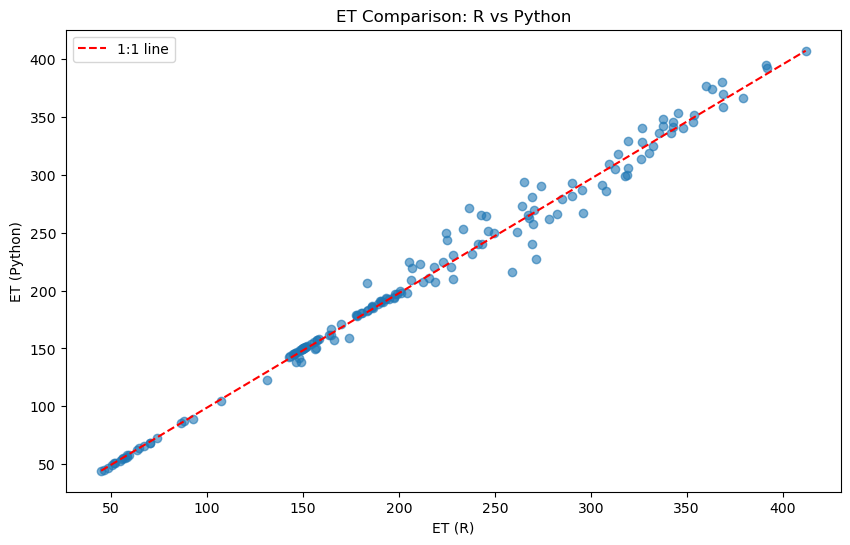

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ET (R)'], df['ET (Python)'], alpha=0.6)
plt.plot([df['ET (R)'].min(), df['ET (R)'].max()], 
         [df['ET (Python)'].min(), df['ET (Python)'].max()], 
         'r--', label='1:1 line')
plt.xlabel('ET (R)')
plt.ylabel('ET (Python)')
plt.title('ET Comparison: R vs Python')
plt.legend()
plt.show()

# TimeSeries Visual

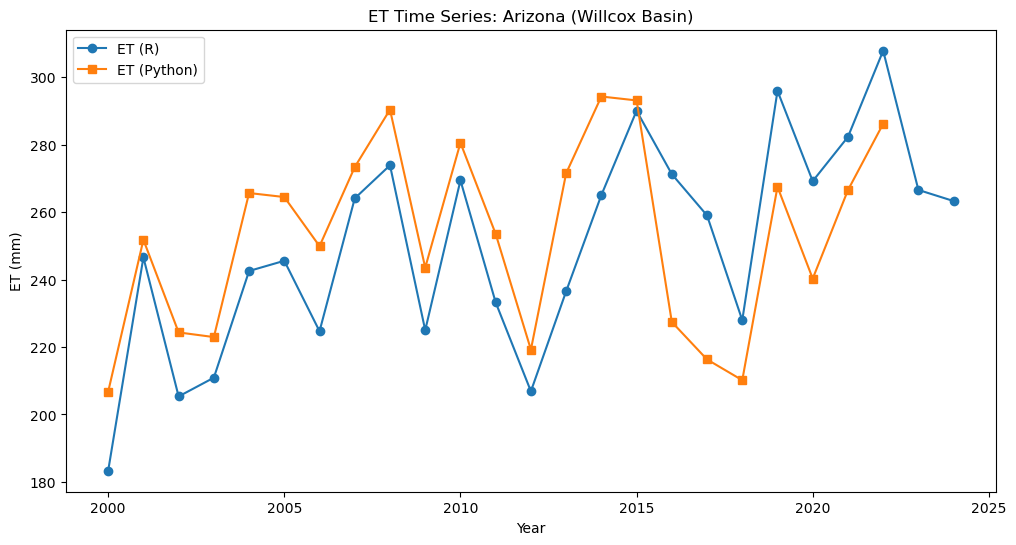

In [9]:
# For a specific site
site_name = 'Arizona (Willcox Basin)'
site_data = df[df['Site'] == site_name].sort_values('Year')

plt.figure(figsize=(12, 6))
plt.plot(site_data['Year'], site_data['ET (R)'], 'o-', label='ET (R)')
plt.plot(site_data['Year'], site_data['ET (Python)'], 's-', label='ET (Python)')
plt.xlabel('Year')
plt.ylabel('ET (mm)')
plt.title(f'ET Time Series: {site_name}')
plt.legend()
plt.show()